## Strategy 1 - Finding Most Linear Stocks over 90 days (~60 trading).
#### 1. Find the trending stocks in all Nasdaq indices. Find best linear curve fit for the stocks over last 60 days and plot the results.  
1.1 Downloading data for all Nasdaq stocks and saving it in a csv file. Last 100 points (days)

In [1]:
import os
from src.common.globals import G, Analysis
from src.data.get_data import AlphaVantageAPI as AV

NASDAQ_TICKERS = G.all_nasdaq_tickers
PROJECT_PATH = G.get_project_root()
DATA_PATH = os.path.join(PROJECT_PATH, r'data\00_raw\daily_full')

In [2]:
AV.get_daily_data_for_list(NASDAQ_TICKERS, directory=DATA_PATH, full_or_compact='full')

1.2 Finding stocks trending upwards in the most linear way for Last 60 days for medium term investment analysis.  
* For this we will use Linear Regression from SKLearn module. We will correalte the stock price with the number of days and find the best fit line.  
* We can use the slope of the line to determine the trend. The slope will be positive if the stock is trending upwards and negative if the stock is trending downwards. 
* We will use the R2 score to determine how linear the trend is. The high the R2 score the more linear the trend is. We will use the R2 score to rank the stocks.

In [5]:
agg_stocks = Analysis.aggregate_close_prices(DATA_PATH, calendar_days_back=40)

In [6]:
df = Analysis.find_best_linear_stock(agg_stocks)

d:\Study 2018 and later\Mignimind Bootcamp\Code\p7-trading-bot\src\common\globals.py:220: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stats = pd.concat([df_stats, pd.DataFrame({'ticker': col, 'R2': model.score(X,y), 'slope': model.coef_[0]}, index=[0])], ignore_index=True)


Filtering the data to get the most linear and the least linear stocks.  
Plotting the results to check if the results make sense.

In [13]:
# Most linear
df.sort_values(by='slope', ascending=False).head()

,ticker,R2,slope
1474,MELI,0.149679,3.649054
1960,REGN,0.751421,3.567228
297,BKNG,0.058027,3.243205
418,CELH,0.828379,2.243117
1640,NVDA,0.376113,1.761804


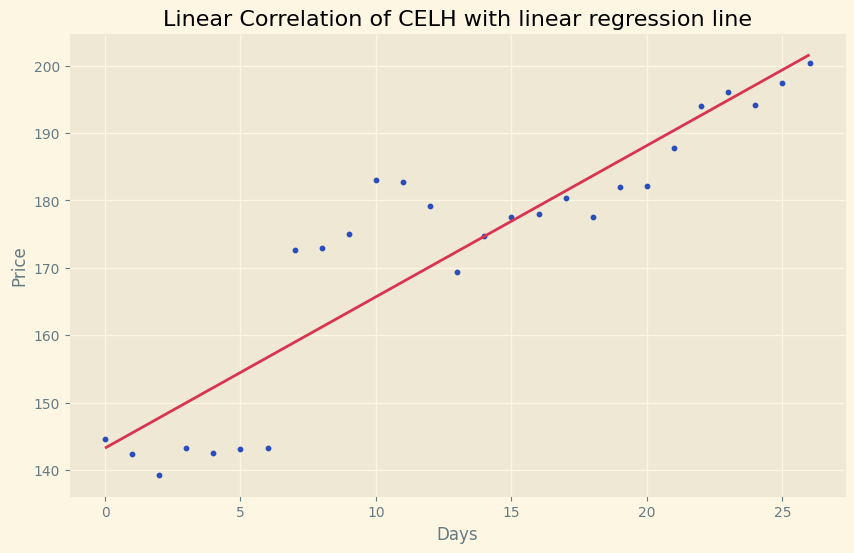

In [15]:
Analysis.plot_correlation(agg_stocks['CELH'])

In [9]:
# Least Linear 
df.sort_values(by='R2', ascending=False).tail(3)

,ticker,R2,slope
381,CASS,7.531606e-07,-0.000056
2301,TOPS,3.535194e-07,0.000003
2069,SEED,3.226406e-08,-0.000006


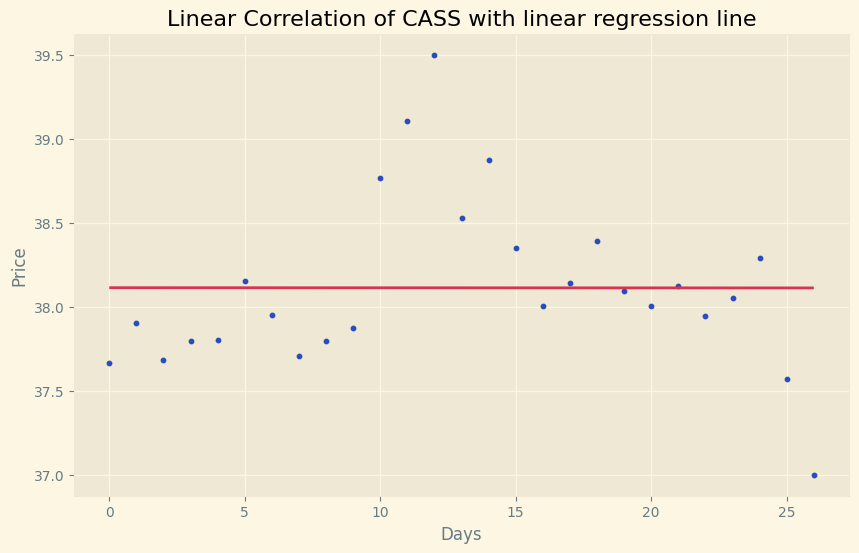

In [16]:
Analysis.plot_correlation(agg_stocks['CASS'])